# Visualization of US-Pumpkins Dataset

There are several different libraries that are available for data visualization. In this assignment, you will create some visualizations using the Pumpkin data with matplotlib and seaborn and determine Which libraries are easier to work with.

## Prepare the Data

Let's use Pandas to analyze and prepare this pumpkin data.

First, import and preview the data.

In [1]:
import pandas as pd

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')

pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

Check the missing data.

In [3]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

There is missing data, but maybe it won't matter for the task at hand.

To make the dataframe easier to work with, drop columns with more than 5% missing data.

In [4]:
pumpkins = pumpkins.dropna(axis=1, thresh=len(pumpkins) * 0.95)

pumpkins.isnull().sum()

City Name     0
Package       0
Variety       0
Date          0
Low Price     0
High Price    0
Origin        0
Repack        0
dtype: int64

Secondly, determine average price of pumpkin.

Take the average of the `Low Price` and `High Price` columns to populate the new Price column, and convert the Date column to only show the month.

In [5]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month': month, 
                             'City Name': pumpkins['City Name'], 
                             'Package': pumpkins['Package'], 
                             'Variety': pumpkins['Variety'], 
                             'Origin': pumpkins['Origin'],
                             'Low Price': pumpkins['Low Price'],
                             'High Price': pumpkins['High Price'],
                             'Repack': pumpkins['Repack'],
                             'Price': price})

new_pumpkins.head()

,Month,City Name,Package,Variety,Origin,Low Price,High Price,Repack,Price
70,9,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,15.0,15.0,N,15.0
71,9,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,18.0,18.0,N,18.0
72,10,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,18.0,18.0,N,18.0
73,10,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,OHIO,17.0,17.0,N,17.0
74,10,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,15.0,15.0,N,15.0


But there's something odd here

If you look at the `Package` column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

Digging into the original data, it's interesting that anything with `Unit of Sale` equalling 'EACH' or 'PER BIN' also have the `Package` type per inch, per bin, or 'each'. Pumpkins seem to be very hard to weigh consistently, so let's filter them by selecting only pumpkins with the string 'bushel' in their `Package` column.

Add a filter at the top of the file, under the initial .csv import.

If you print the data now, you can see that you are only getting the 415 or so rows of data containing pumpkins by the bushel.

In [6]:
new_pumpkins

,Month,City Name,Package,Variety,Origin,Low Price,High Price,Repack,Price
70,9,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,15.00,15.0,N,15.000
71,9,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,18.00,18.0,N,18.000
72,10,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,18.00,18.0,N,18.000
73,10,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,OHIO,17.00,17.0,N,17.000
74,10,BALTIMORE,1 1/9 bushel cartons,PIE TYPE,DELAWARE,15.00,15.0,N,15.000
...,...,...,...,...,...,...,...,...,...
1738,9,ST. LOUIS,1/2 bushel cartons,MINIATURE,CANADA,15.00,15.0,N,15.000
1739,9,ST. LOUIS,1/2 bushel cartons,MINIATURE,ILLINOIS,13.75,15.0,N,14.375
1740,9,ST. LOUIS,1/2 bushel cartons,MINIATURE,ILLINOIS,10.75,15.0,N,12.875
1741,9,ST. LOUIS,1/2 bushel cartons,MINIATURE,MICHIGAN,12.00,12.0,N,12.000


But wait! There's one more thing to do

The bushel amount varies per row. you need to normalize the pricing so that you show the pricing per bushel, so do some math to standardize it.

In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

Now, you are ready to visuaize the data.

## Visualize the Data

The goal of the visualization is to:

1. Find which variables can be used to predict the average price of pumpkin.
2. Compare the Matplotlib and Seaborn libraries.

First, import the libraries.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### Matplotlib - Boxplot of Price by Origin

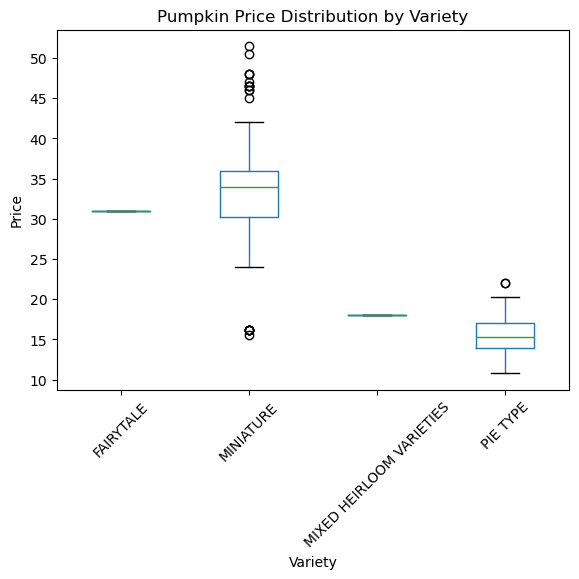

In [9]:
new_pumpkins.boxplot(column='Price', by='Variety', grid=False, rot=45)
plt.title('Pumpkin Price Distribution by Variety')
plt.suptitle('')
plt.ylabel('Price')
plt.show()

The boxplot shows that the median price and price distribution vary significantly across pumpkin varieties. This suggests that Variety is a meaningful predictor of Price, as different varieties are associated with distinct price levels and distributions.

### Seaborn - Heatmap of Feature Correlations

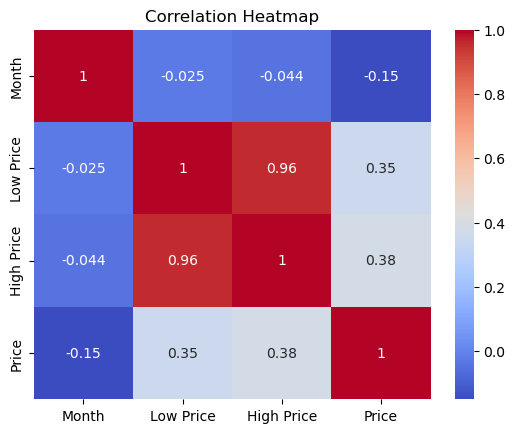

In [10]:
corr = new_pumpkins[['Month','Low Price','High Price','Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Low Price and High Price are moderately correlated with Price, indicating they can help predict Price. Month has a weak correlation, so it is less useful for prediction.

### Conclusion

Matplotlib provides flexibility and control over plot details, but requires more code for customization, for example setting titles, labels, and rotation. Seaborn offers simpler syntax for statistical plots and attractive default styles, making it easier and faster to create complex visualizations like heatmaps.

Overall, Seaborn is generally easier to work with for statistical visualizations due to its concise syntax and built-in aesthetics.